# spaCyチュートリアル
#### 01 spaCy初級

## spaCyのインストール

In [1]:
# # spaCyのインストール
# !conda install spacy

In [2]:
import spacy
import ginza

## 学習済みモデルをダウンロード

spaCyは英語、ドイツ語、フランス語、スペイン語、ポルトガル語、イタリア語、オランダ語、ギリシャ語等の多言語をサポートしています。  

英語モデルでは基本的に小・中・大のサイズから選ぶことになり、精度と速度はトレードオフの関係にあります。また小サイズには単語ベクトルが付属していないなどの制限があります。  

モデルファイルには重み、語彙、モデルパイプラインのメタ情報が含まれています。 

日本語はMegagon Labsの[GiNZA](https://github.com/megagonlabs/ginza)が公開されているのでそれを使用します。

In [3]:
# # GiNZAのインストール
# !pip install -U ginza
# # モデルのダウンロード後にカーネルを再起動します

## モデルを読み込む

In [4]:
# nlpオブジェクトを作成
nlp = spacy.load("ja_ginza")

In [5]:
# 例文
例文 = """どうも、藤本唯美です。XYZ社でデータサイエンティストとして一生懸命働いています。\
場所は東京都の新宿で、最高の街です! 😊 \
なんとラーメン一杯が７００円で食べれます（令和元年１２月１３日現在）。 (^_^)"""

In [6]:
# nlpオブジェクトで文字列を処理する
文章 = nlp(例文)

## トークン化

トークン化とは文章をトークンと呼ばれるものに分割することです。英語ではすでに空白文字により分かち書きされているので、句読点や絵文字などを除き基本的には空白文字を境に単語単位でトークン化することが多いです。ほとんどのspaCyの機能はカスタマイズ可能で、例えば英語のトークン化の際に名詞の間のinfixであるハイフンを分かち書きルールに加えたりできます。  

![token](img/token.png)  

日本語や中国語、タイ語などは空白文字で分かち書きされていません。 その場合は  
1. SudachiPy、MeCabやJanomeなどの形態素解析のライブラリを使って分かち書きする。  
2. バイト対符号化（Byte Pair Encoding -BPE）でサブワードに分割する.  
BPEはGoogleのBERTで使用されているように、英語でも効果的だとされています。  

GiNZAはトークン化（形態素解析）処理にSudachiPyを使用しています。

**階層:** コーパス > 文章（ドキュメント） > 文 > 単語 > サブワード > 文字 > 部首 > 書き順  

In [7]:
# トークンごとに番号とテキストをプリントする
i = 0
for トークン in 文章:
    i += 1
    print (f"{i} {トークン.text}")

1 どう
2 も
3 、
4 藤本
5 唯美
6 です
7 。
8 XYZ
9 社
10 で
11 データ
12 サイエンティスト
13 と
14 し
15 て
16 一生懸命
17 働い
18 て
19 い
20 ます
21 。
22 場所
23 は
24 東京都
25 の
26 新宿
27 で
28 、
29 最高
30 の
31 街
32 です
33 !
34 😊
35 なん
36 と
37 ラーメン
38 一杯
39 が
40 ７００
41 円
42 で
43 食べれ
44 ます
45 （
46 令和
47 元年
48 １２
49 月
50 １３
51 日
52 現在
53 ）
54 。
55 (^_^)


## ストップワード  
ストップワードは高頻度語であり、下流タスク（単語頻度分析、トピックモデル、カウントベクトライザー、バッグオブワーズ（特徴量数減少に役立つ）など）には必要の無いとされるものです。  

ストップワードの除去は深層学習にはむしろ悪影響であると主張する[AI研究者](https://twitter.com/deliprao/status/1068555626299584512)もいます。理由は打消しなどを意味する言葉を除去することで文の意味が変わってしまう可能性があるからです。  

ストップワードリストはカスタマイズ可能です。

In [8]:
# GiNZAには150程のストップワードが含まれている 
ストップワード = ginza.STOP_WORDS
len(ストップワード)

154

In [9]:
# 30語のストップワードをプリントしてみる
list(ストップワード)[:30]

['つ',
 'しまっ',
 'そして',
 'で',
 'なっ',
 'こう',
 'はじめ',
 'しよう',
 'のち',
 'おい',
 'もと',
 'よれ',
 'さらに',
 'よ',
 'つい',
 'いわ',
 'の',
 'その',
 'そこ',
 'よう',
 'のみ',
 'ご',
 'なら',
 'か',
 'き',
 'あるいは',
 'おり',
 'とっ',
 'しか',
 '一']

## 見出し語化  
見出し語化（Lemmatization）は単語を原型（lemma）に変換します。語幹処理（Stemming）と違いlemmaは実際の言葉として存在します。英語の例は下記の表をご覧ください。  

見出し語化は品詞(**POS**)タグ付けに依存しており、（今のところは）ルールベースです。  

見出し語化は正規化なので、ストップワードと同様に下流タスクで役に立つことがあります。しかし、深層学習ではこの前処理をしないことがほとんどです。  

spaCyには語幹処理はありません。  

GiNZAでもlemmaは辞書に出てくるような表記に正規化されるようです。

単語 | Stem | Lemma
--- | --- | ---
Studies | Studi | Study
Studying | Study | Study

In [10]:
# トークンごとに番号とテキスト、見出し語をプリントする
i = 0
for トークン in 文章:
    i += 1
    print (f"{i} {トークン.text} \t\t {トークン.lemma_}")

1 どう 		 どう
2 も 		 も
3 、 		 、
4 藤本 		 藤本
5 唯美 		 唯美
6 です 		 です
7 。 		 。
8 XYZ 		 xyz
9 社 		 社
10 で 		 で
11 データ 		 データ
12 サイエンティスト 		 サイエンティスト
13 と 		 と
14 し 		 為る
15 て 		 て
16 一生懸命 		 一生懸命
17 働い 		 働く
18 て 		 て
19 い 		 居る
20 ます 		 ます
21 。 		 。
22 場所 		 場所
23 は 		 は
24 東京都 		 東京都
25 の 		 の
26 新宿 		 新宿
27 で 		 で
28 、 		 、
29 最高 		 最高
30 の 		 の
31 街 		 街
32 です 		 です
33 ! 		 ！
34 😊 		 😊
35 なん 		 何
36 と 		 と
37 ラーメン 		 ラーメン
38 一杯 		 一杯
39 が 		 が
40 ７００ 		 700
41 円 		 円
42 で 		 で
43 食べれ 		 食べる
44 ます 		 ます
45 （ 		 （
46 令和 		 令和
47 元年 		 元年
48 １２ 		 12
49 月 		 月
50 １３ 		 13
51 日 		 日
52 現在 		 現在
53 ） 		 ）
54 。 		 。
55 (^_^) 		 （＾＿＾）


## 文単位分割  
spaCyは文の境界を推論し、文章を文に分割することができます。他の機能同様カスタマイズ可能です。

In [11]:
# 文ごとに番号とテキストをプリントする
i = 0
for 文 in 文章.sents:
    i += 1
    print (f"{i} {文}")

1 どうも、藤本唯美です。
2 XYZ社でデータサイエンティストとして一生懸命働いています。
3 場所は東京都の新宿で、最高の街です!
4 😊 なんとラーメン一杯が７００円で食べれます（令和元年１２月１３日現在）。 (^_^)


## 統計モデル  
spaCyには3種類の統計モデルが付属されています。  
1. 品詞 (**POS**)タグ付け
2. 固有表現抽出 (**NER**)
3. 依存構文解析のラベル付け  

spaCy英語モデルの学習方法はマルチタスクで教師ありseq2Seqの畳み込みニューラルネットワークで、サブワード埋め込みや 残差接続、層の正規化などを利用しています。自分のラベル付きデータを使い再学習されることも可能です。  

GiNZAでは3は同様のアーキテキチャを採用しつつも[独自なやり方](https://www.anlp.jp/proceedings/annual_meeting/2019/pdf_dir/F2-3.pdf)をしているようです。具体的にはJapaneseCorrectorというパイプラインで形態素解析誤り（トークン分割、品詞）の補修をしています。

### 品詞（**POS**）タグ付け  
品詞は単語を文法的な機能や形態などによって分類したものです。  

例:
- Noun（名詞）
- Pronoun（代名詞）
- Proper noun（固有名詞）
- Adjective（形容詞）
- Verb（動詞）
- Adverb（副詞）
- Adposition（接置詞）
- Auxiliary（助動詞）
- Punctuation（句読）
- Determiner（限定詞）
- Subordinating conjunction（従属接続詞）
- Interjection（間投詞）

GiNZAにはUniDic短単位品詞も含まれています。

In [12]:
# トークンごとに番号とテキスト、品詞をプリントする 
i = 0
for トークン in 文章:
    i += 1
    print (f"{i} {トークン.text} \t\t {トークン.pos_} \t\t {トークン.tag_} \t\t {トークン._.inf}")

1 どう 		 ADV 		 副詞 		 *,*
2 も 		 ADP 		 助詞-係助詞 		 *,*
3 、 		 PUNCT 		 補助記号-読点 		 *,*
4 藤本 		 PROPN 		 名詞-固有名詞-人名-姓 		 *,*
5 唯美 		 NOUN 		 名詞-普通名詞-一般 		 *,*
6 です 		 AUX 		 助動詞 		 助動詞-デス,終止形-一般
7 。 		 PUNCT 		 補助記号-句点 		 *,*
8 XYZ 		 NOUN 		 名詞-普通名詞-一般 		 *,*
9 社 		 NOUN 		 名詞-普通名詞-助数詞可能 		 *,*
10 で 		 ADP 		 助詞-格助詞 		 *,*
11 データ 		 NOUN 		 名詞-普通名詞-一般 		 *,*
12 サイエンティスト 		 NOUN 		 名詞-普通名詞-一般 		 *,*
13 と 		 ADP 		 助詞-格助詞 		 *,*
14 し 		 AUX 		 動詞-非自立可能 		 サ行変格,連用形-一般
15 て 		 SCONJ 		 助詞-接続助詞 		 *,*
16 一生懸命 		 ADJ 		 名詞-普通名詞-一般 		 *,*
17 働い 		 VERB 		 動詞-一般 		 五段-カ行,連用形-イ音便
18 て 		 SCONJ 		 助詞-接続助詞 		 *,*
19 い 		 AUX 		 動詞-非自立可能 		 上一段-ア行,連用形-一般
20 ます 		 AUX 		 助動詞 		 助動詞-マス,終止形-一般
21 。 		 PUNCT 		 補助記号-句点 		 *,*
22 場所 		 NOUN 		 名詞-普通名詞-一般 		 *,*
23 は 		 ADP 		 助詞-係助詞 		 *,*
24 東京都 		 NOUN 		 名詞-固有名詞-地名-一般 		 *,*
25 の 		 ADP 		 助詞-格助詞 		 *,*
26 新宿 		 PROPN 		 名詞-固有名詞-地名-一般 		 *,*
27 で 		 ADP 		 助詞-格助詞 		 *,*
28 、 		 PUNCT 		 補助記号-読点 		 *,*
29 最高 		 ADJ 		 名詞-普通名詞-形状詞可能 		 *,*
30 の 		 ADP 		

### 固有表現抽出（Named Entity Recognizer - **NER**）  
固有表現抽出は固有表現の位置を推論し、あらかじめ定義されたカテゴリへと分類します。    
- PERSON	人名。キャラクター名含む。  
- FAC	建物、空港、高速道路、橋など。  
- ORG	組織名、会社、機関、施設など。  
- GPE	地名、国、町、県など。  
- PRODUCT	物、乗り物、食べ物など（サービス除く）。  
- EVENT	台風、戦い、戦争、スポーツのイベントなど。  
- DATE	日付や期間。  
- TIME	一日より小さい時間の単位。  
- MONEY	金額（通貨単位含む）。  
- QUANTITY	重量や距離。  
- ORDINAL	一番、二番など。  
- CARDINAL	その他の数量。  

In [13]:
# 抽出されたトークンごとに番号とテキスト、固有表現をプリントする 
i = 0
for トークン in 文章.ents:
    i += 1
    print (f"{i} {トークン.text} \t\t {トークン.label_}")

1 藤本唯美 		 Person
2 XYZ社 		 Company
3 東京都 		 Province
4 新宿 		 City
5 ラーメン 		 Dish
6 ７００円 		 Money
7 令和元年１２月１３日現在 		 Date


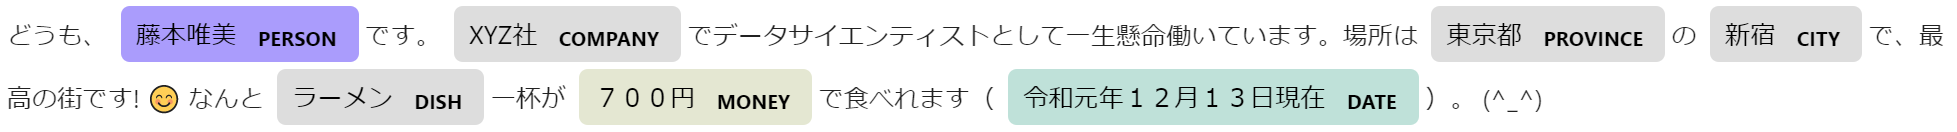

In [14]:
# 固有表現を視覚化する
spacy.displacy.render(文章, style='ent')

### 依存構文解析のラベル付け  
依存構文解析とは文章を形態素に切分け、その間の依存関係を抽出することです。抽出された構造は有向グラフとしてもみなされ、深層学習の様々な手法で使われています（木構造再帰ニューラルネット、グラフニューラルネットワークなど）。

In [15]:
# トークンごとに番号とテキスト、依存関係をプリントする
i = 0
for トークン in 文章:
    i += 1
    print (f"{i} {トークン.text} \t\t {トークン.dep_} \t\t {トークン.head.text}")

1 どう 		 ROOT 		 どう
2 も 		 case 		 どう
3 、 		 punct 		 どう
4 藤本 		 compound 		 唯美
5 唯美 		 punct 		 どう
6 です 		 cop 		 唯美
7 。 		 punct 		 唯美
8 XYZ 		 compound 		 社
9 社 		 nmod 		 働い
10 で 		 case 		 社
11 データ 		 compound 		 サイエンティスト
12 サイエンティスト 		 nmod 		 働い
13 と 		 case 		 サイエンティスト
14 し 		 aux 		 サイエンティスト
15 て 		 mark 		 サイエンティスト
16 一生懸命 		 amod 		 働い
17 働い 		 ROOT 		 働い
18 て 		 mark 		 働い
19 い 		 aux 		 働い
20 ます 		 aux 		 働い
21 。 		 punct 		 働い
22 場所 		 nsubj 		 新宿
23 は 		 case 		 場所
24 東京都 		 nmod 		 新宿
25 の 		 case 		 東京都
26 新宿 		 ROOT 		 新宿
27 で 		 case 		 新宿
28 、 		 punct 		 新宿
29 最高 		 nmod 		 街
30 の 		 case 		 最高
31 街 		 punct 		 新宿
32 です 		 cop 		 街
33 ! 		 punct 		 街
34 😊 		 dep 		 食べれ
35 なん 		 nmod 		 と
36 と 		 advmod 		 食べれ
37 ラーメン 		 compound 		 一杯
38 一杯 		 nsubj 		 食べれ
39 が 		 case 		 一杯
40 ７００ 		 nummod 		 円
41 円 		 nmod 		 食べれ
42 で 		 case 		 円
43 食べれ 		 dep 		 (^_^)
44 ます 		 aux 		 食べれ
45 （ 		 punct 		 食べれ
46 令和 		 compound 		 食べれ
47 元年 		 compound 		 食べれ
48 １２ 		 nummod 		 食

In [16]:
# 依存関係を視覚化する
# 文に分割する
文スパン = list(文章.sents)
spacy.displacy.render(文スパン, style="dep")